#  Imports

In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import joblib
import matplotlib.pyplot as plt

data = pd.read_csv("/workspaces/bakery_sales_prediction/merged_sales_weather_kiwo_data.csv", parse_dates=["Datum"])

print(' Step complete')

 Step complete


# clean up data and define features and target


In [8]:
data = data.dropna(subset=["Umsatz"])

features = [
    "Warengruppe", "KielerWoche", "DayOfWeek", "Weekend", "Month",
    "TemperatureCategory", "CloudCategory", "WindCategory",
    "IsHoliday_lib", "Season"
]
target = "Umsatz"
X = data[features]
y = data[target]

print(' Step complete')

 Step complete


# Pipeline Construction

In [9]:
categorical_features = ["Warengruppe", "TemperatureCategory", "CloudCategory", "WindCategory", "Season"]
numerical_features = ["KielerWoche", "DayOfWeek", "Weekend", "Month", "IsHoliday_lib"]

# Pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
], remainder="passthrough")

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

print(' Step complete')

 Step complete


# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

print(' Step complete')

 Step complete


# Evaluation

In [11]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAPE: {mape:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")


MAPE: 0.2030
Mean Squared Error: 5579.66
R² Score: 0.737


# actual vs predicted sales


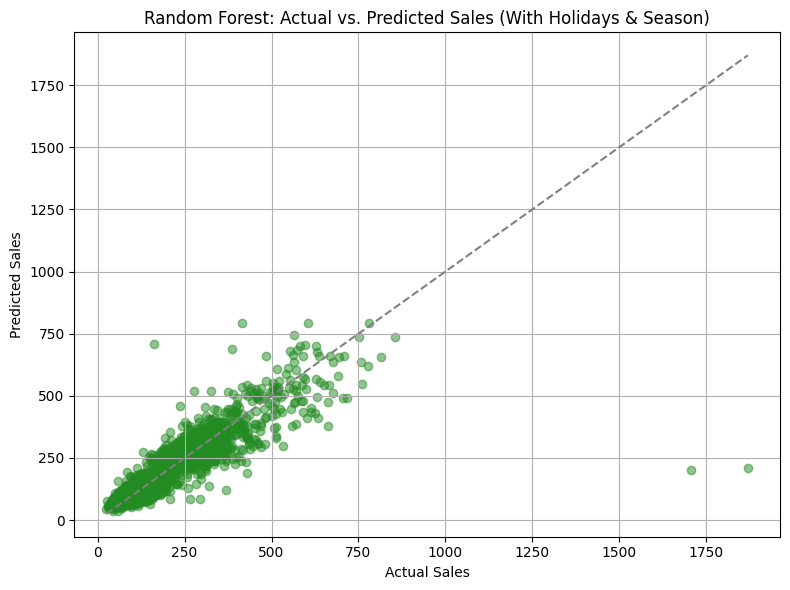

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs. Predicted Sales (With Holidays & Season)")
plt.grid(True)
plt.tight_layout()
plt.show()